In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

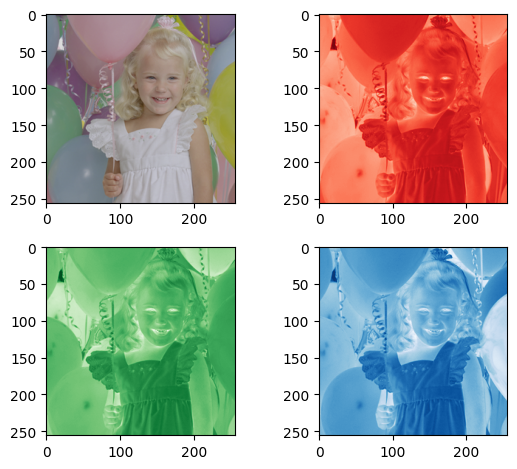

In [2]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBチャネルの分離
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(r_channel, cmap='Reds')
axes[1, 0].imshow(g_channel, cmap='Greens')
axes[1, 1].imshow(b_channel, cmap='Blues')

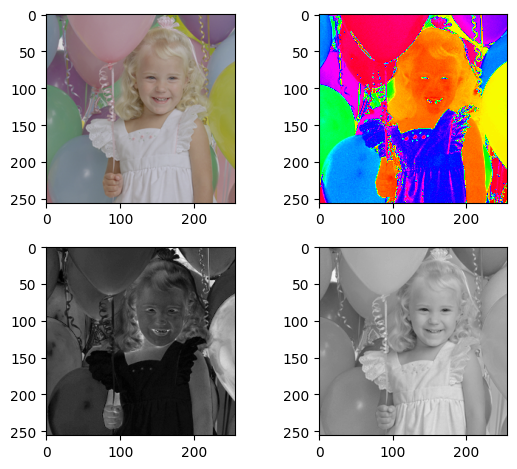

In [11]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBからHSV色空間に変換
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(h_channel, cmap='hsv')
axes[1, 0].imshow(s_channel, cmap='gray')
axes[1, 1].imshow(v_channel, cmap='gray')

In [3]:
# RGBからCMYKに変換する関数
def rgb_to_cmyk(image_rgb):

    # 各RGBチャネルを0-1に正規化
    image_rgb_normalized = image_rgb / 255.0
    
    # CMYの計算
    c = 1 - image_rgb_normalized[..., 0]
    m = 1 - image_rgb_normalized[..., 1]
    y = 1 - image_rgb_normalized[..., 2]
    
    # Kチャンネルの計算
    k = np.min([c, m, y], axis=0)
    
    # C, M, Yの値をKに基づいて調整
    c = c - k
    m = m - k
    y = y - k
    
		# 0-255の範囲に変換
    cmyk = np.zeros(image_rgb.shape[:2] + (4,), dtype=np.uint8) 
    cmyk[..., 0] = (c * 255).astype(np.uint8)
    cmyk[..., 1] = (m * 255).astype(np.uint8)
    cmyk[..., 2] = (y * 255).astype(np.uint8)
    cmyk[..., 3] = (k * 255).astype(np.uint8)
    
    return cmyk

In [4]:
# 各チャンネルの色を擬似的に再現して表示する
def display_color_channel(channel, color):
    # カラーマップ作成
    blank = np.zeros_like(channel)
    
    if color == 'cyan':
        return np.stack([blank, channel, channel], axis=-1)
    elif color == 'magenta':
        return np.stack([channel, blank, channel], axis=-1)
    elif color == 'yellow':
        return np.stack([channel, channel, blank], axis=-1)
    elif color == 'black':
        return np.stack([channel, channel, channel], axis=-1)

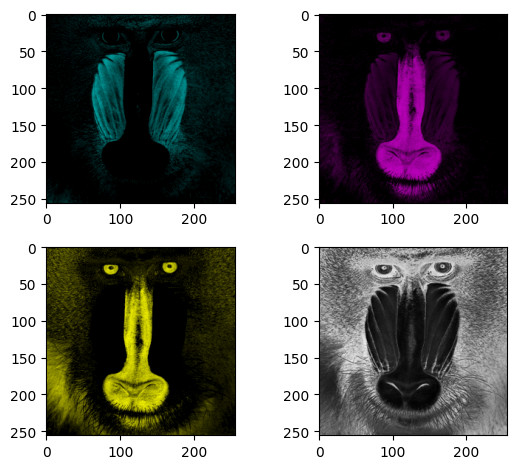

In [9]:
# 画像ファイルの読み込み
#image = cv2.imread('samples/Balloon.bmp')
image = cv2.imread('samples/Mandrill.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# CMYK色空間に変換
image_cmyk = rgb_to_cmyk(image_rgb)

# CMYKチャネルの分離
c_channel, m_channel, y_channel, k_channel = cv2.split(image_cmyk)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(display_color_channel(c_channel, 'cyan'))
axes[0, 1].imshow(display_color_channel(m_channel, 'magenta'))
axes[1, 0].imshow(display_color_channel(y_channel, 'yellow'))
axes[1, 1].imshow(display_color_channel(k_channel, 'black'))

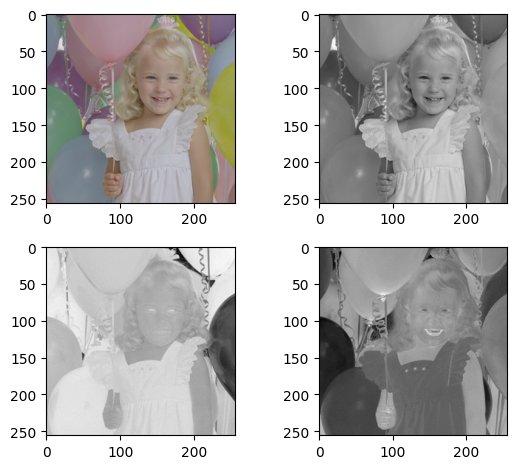

In [12]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGBからYUV色空間に変換
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)

# YUVチャネルの分離
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# 元画像と各チャネルの画像を表示
fig, axes = plt.subplots(2, 2, tight_layout=True)
axes[0, 0].imshow(image_rgb)
axes[0, 1].imshow(y_channel, cmap='gray')
axes[1, 0].imshow(u_channel, cmap='gray')
axes[1, 1].imshow(v_channel, cmap='gray')

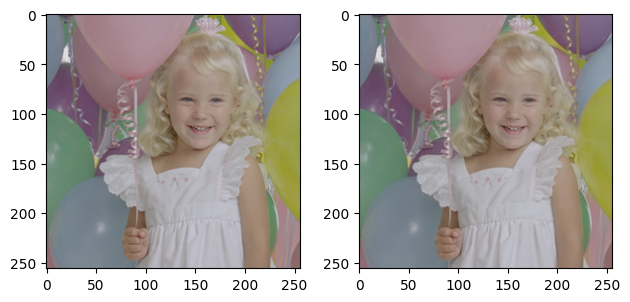

In [42]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからYUV色空間に変換
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# YUVチャネルの分離
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# UとVチャネルを4:2:0サブサンプリング（縦横で1/2のサイズに縮小）
u_subsampled = cv2.resize(u_channel, (u_channel.shape[1] // 2, u_channel.shape[0] // 2), interpolation=cv2.INTER_LINEAR)
v_subsampled = cv2.resize(v_channel, (v_channel.shape[1] // 2, v_channel.shape[0] // 2), interpolation=cv2.INTER_LINEAR)

# サブサンプリングしたUとVを元のサイズにアップサンプリング
u_upsampled = cv2.resize(u_subsampled, (u_channel.shape[1], u_channel.shape[0]), interpolation=cv2.INTER_LINEAR)
v_upsampled = cv2.resize(v_subsampled, (v_channel.shape[1], v_channel.shape[0]), interpolation=cv2.INTER_LINEAR)

# 再構成したYUV画像の作成
image_yuv_compressed = cv2.merge([y_channel, u_upsampled, v_upsampled])

# YUVからBGR色空間に再変換
image_compressed_rgb = cv2.cvtColor(image_yuv_compressed, cv2.COLOR_YUV2RGB)

# 元画像と圧縮画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_compressed_rgb)

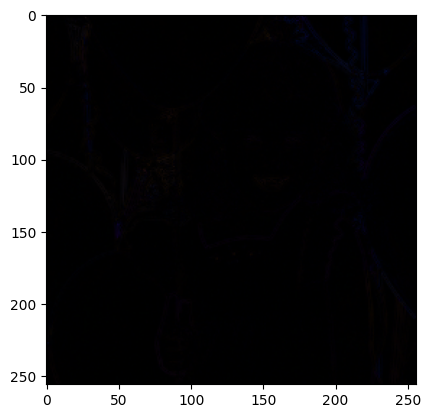

In [31]:
# オリジナル画像と圧縮画像の差分を計算
difference = cv2.absdiff(image_rgb, image_compressed_rgb)
plt.imshow(difference)

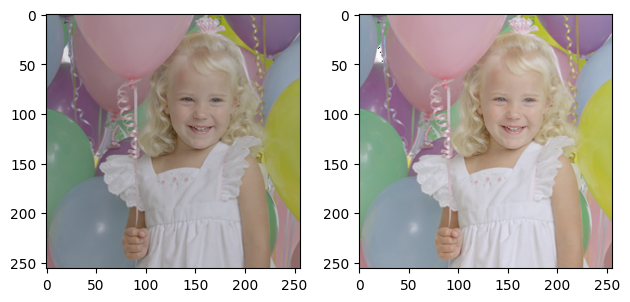

In [55]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Vチャンネルに明るさを加える
brightness = 30  # 明るさを50上げる
v_channel = np.clip(v_channel + brightness, 0, 255)  # 値を0-255の範囲に制限

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_brightened_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_brightened_rgb)

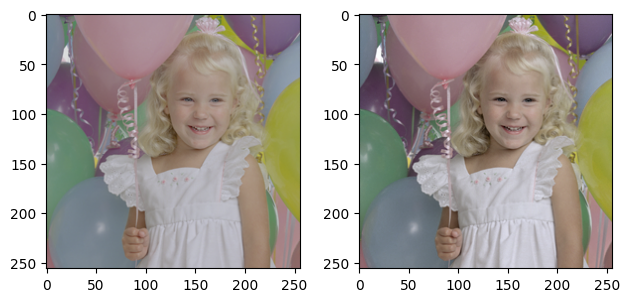

In [58]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Vチャネルのピクセル値の平均を基準に、コントラストを調整
mean_v = np.mean(v_channel)
    
# V値をコントラスト値に基づいて調整する
contrast = 1.5  # 1.5倍のコントラスト
v_channel = np.clip(contrast * (v_channel - mean_v) + mean_v, 0, 255)
v_channel = v_channel.astype(np.uint8)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_contrast_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_contrast_rgb)

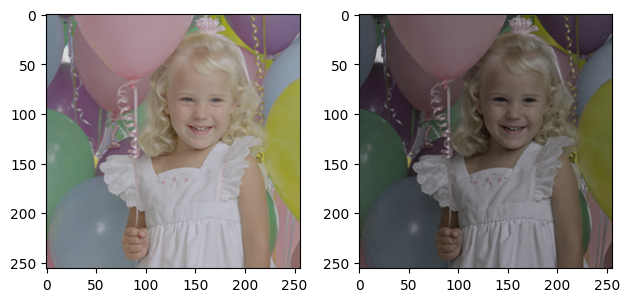

In [61]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Balloon.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGRからHSV色空間に変換
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSVチャネルの分離
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# 正規化（0〜1の範囲にスケーリング）
v_channel_normalized = v_channel / 255.0
    
# ガンマ補正を適用
gamma = 2.0  # ガンマ値を2.0に設定（暗くなる）
v_channel_corrected = np.power(v_channel_normalized, gamma)
    
# 0〜255の範囲に再スケーリングし、uint8に変換
v_channel = np.uint8(v_channel_corrected * 255)

# 調整後のVチャネルを元にHSV画像を再構成
image_hsv_adjusted = cv2.merge([h_channel, s_channel, v_channel])

# HSVからRGB色空間に戻す
image_gamma_rgb = cv2.cvtColor(image_hsv_adjusted, cv2.COLOR_HSV2RGB)

# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(image_gamma_rgb)

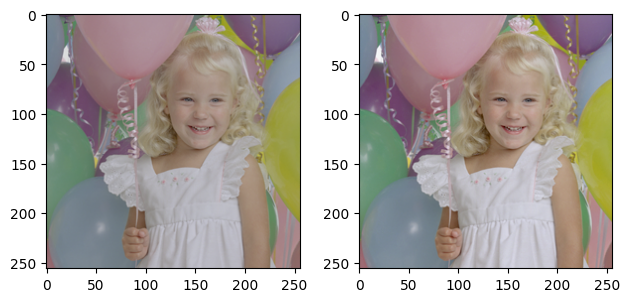

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像ファイルの読み込み（グレースケールで）
image = cv2.imread('samples/Balloon.bmp')

# ヒストグラムストレッチングの実装（線形変換）
def linear_histogram_stretching(image):
    # 入力画像の最小値と最大値を取得
    min_val = np.min(image)
    max_val = np.max(image)
    
    # 線形変換（画像の全ピクセル値を [0, 255] に正規化）
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    stretched_image = stretched_image.astype(np.uint8)
    
    return stretched_image

# ヒストグラムストレッチングを適用
stretched_image = linear_histogram_stretching(image)

# オリジナル画像とストレッチング後の画像のヒストグラムをプロット
def plot_histogram(image, title, subplot_position):
    plt.subplot(subplot_position)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(title)
    plt.xlim([0, 256])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
stretched_image_rgb = cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(stretched_image_rgb)
